In [1]:
#importing the dataset
import pandas as pd
import numpy as np
import math
import seaborn as sns

df = pd.read_csv('song_data.csv')

#song_name 칼럼 삭제
df.drop(['song_name'], axis=1, inplace=True)
df.head(3)

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,73,262333,0.00552,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,66,216933,0.01030,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,76,231733,0.00817,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_popularity   18835 non-null  int64  
 1   song_duration_ms  18835 non-null  int64  
 2   acousticness      18835 non-null  float64
 3   danceability      18835 non-null  float64
 4   energy            18835 non-null  float64
 5   instrumentalness  18835 non-null  float64
 6   key               18835 non-null  int64  
 7   liveness          18835 non-null  float64
 8   loudness          18835 non-null  float64
 9   audio_mode        18835 non-null  int64  
 10  speechiness       18835 non-null  float64
 11  tempo             18835 non-null  float64
 12  time_signature    18835 non-null  int64  
 13  audio_valence     18835 non-null  float64
dtypes: float64(9), int64(5)
memory usage: 2.0 MB


In [3]:
target = 'song_popularity'
features = [i for i in df.columns if i not in [target]]

In [4]:
#각 피처들의 unique row 체크
df.nunique().sort_values()

audio_mode              2
time_signature          5
key                    12
song_popularity       101
danceability          849
energy               1132
speechiness          1224
audio_valence        1246
liveness             1425
acousticness         3209
instrumentalness     3925
loudness             8416
song_duration_ms    11771
tempo               12112
dtype: int64

In [5]:
#numerical 변수와 categorical 변수 구분
#-> unique row의 개수가 16개인 기준으로 16개 이하면 categorical, 16개 이상이면 numerical
nu = df[features].nunique().sort_values()
nf = [] ; cf = []; nnf = 0; ncf = 0;

for i in range(df[features].shape[1]):
    if nu.values[i] <= 16:
        cf.append(nu.index[i])
    else:
        nf.append(nu.index[i])
        
print('The Dataset has', len(nf), 'numerical &', len(cf),'categorical features')

The Dataset has 10 numerical & 3 categorical features


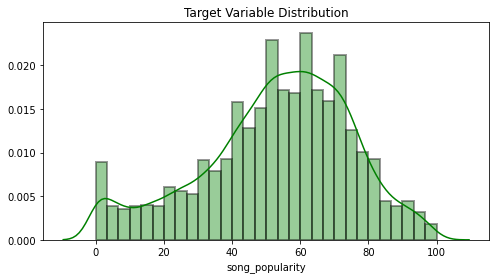

In [6]:
#Target 변수(song_popularity) 분포도 살펴보기
import matplotlib.pyplot as plt
plt.figure(figsize=[8,4])
sns.distplot(df[target], color='g', hist_kws=dict(edgecolor='black', linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

target 변수는 평균이 60정도인 정규분포와 비슷한 형태를 띈다. (스케일링 따로 필요 없음)

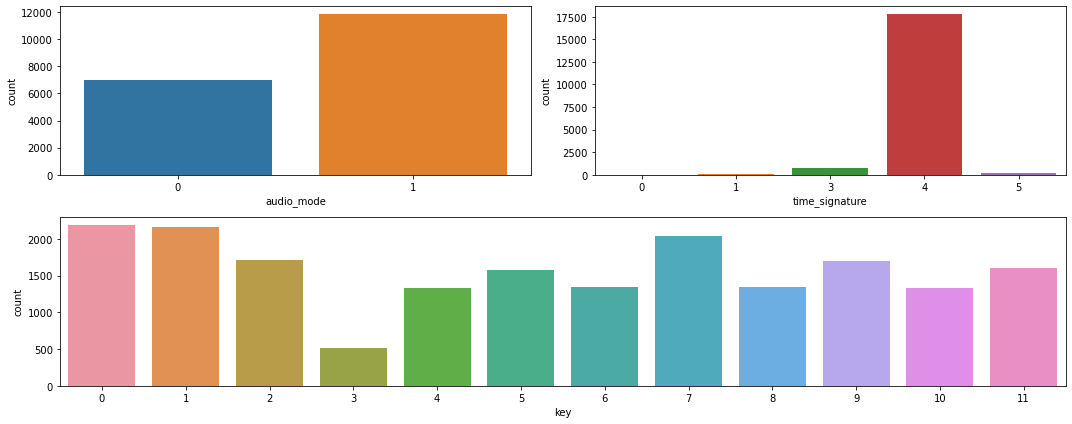

In [7]:
#Categorical 변수(audio_mode, time_signature, key) 분포 살펴보기
n = 2
plt.figure(figsize=[15,3*math.ceil(len(cf)/n)])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=8:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(2,1,2)
        sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()
        

                                 Numeric Features Distribution                                  


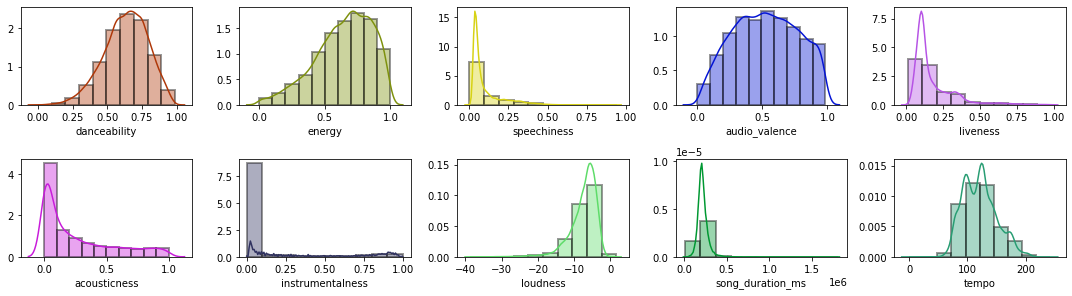

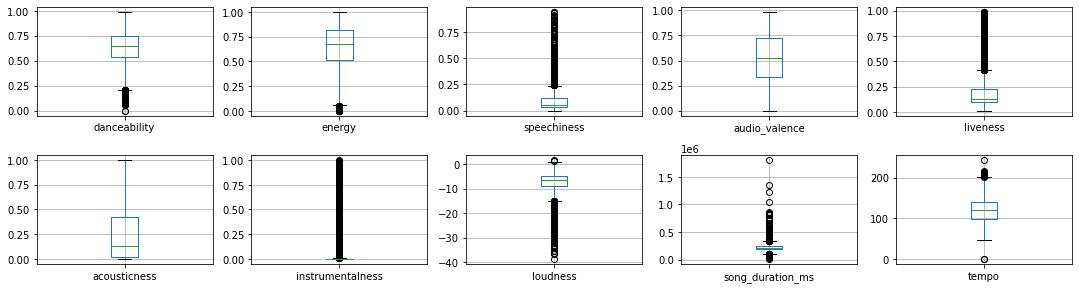

In [8]:
#numeric 변수들 visualizing
print('\033[1mNumeric Features Distribution'.center(100))

n=5

clr=['r','g','b','g','b','r']

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,4*math.ceil(len(nf)/n)])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),n,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

some outliers가 있어보임

몇몇 피처들이 선형 관계를 갖고 있는 것 같음 -> 다중공선성 의심

In [9]:
#duplicated data 삭제
counter = 0
original_df = df.copy(deep=True)
rs, cs = original_df.shape

df.drop_duplicates(inplace=True)
if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: Number of duplicates dropped/fixed ---> 3911


In [10]:
#결측치 있는지 확인
df.isnull().sum().sort_values()

song_popularity     0
song_duration_ms    0
acousticness        0
danceability        0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
audio_mode          0
speechiness         0
tempo               0
time_signature      0
audio_valence       0
dtype: int64

-> 결측치 없음!

In [11]:
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                  Total Null Values  Percentage
song_popularity                   0         0.0
song_duration_ms                  0         0.0
acousticness                      0         0.0
danceability                      0         0.0
energy                            0         0.0
instrumentalness                  0         0.0
key                               0         0.0
liveness                          0         0.0
loudness                          0         0.0
audio_mode                        0         0.0
speechiness                       0         0.0
tempo                             0         0.0
time_signature                    0         0.0
audio_valence                     0         0.0


In [12]:
#범주형 변수 encoding
df3 = df.copy()

ecc = nvc[nvc['Percentage']!=0].index.values
fcc = [i for i in cf if i not in ecc]
#One-Hot Binay Encoding
oh=True
dm=True
for i in fcc:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df3[i].nunique()<17):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
        
df3.shape

One-Hot Encoding on features:
audio_mode

Dummy Encoding on features:
time_signature
key


(14924, 27)

In [13]:
#Removal of outlier:

df1 = df3.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m\nBefore removal of outliers, The dataset had {} samples.'.format(df3.shape[0]))
print('After removal of outliers, The dataset now has {} samples.'.format(df1.shape[0]))

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
0,73,262333,0.005520,0.496,0.682,0.000029,0.0589,-4.095,1,0.0294,...,0,0,0,0,0,0,1,0,0,0
1,66,216933,0.010300,0.542,0.853,0.000000,0.1080,-6.407,0,0.0498,...,0,1,0,0,0,0,0,0,0,0
2,74,216933,0.026400,0.451,0.970,0.003550,0.1020,-4.938,1,0.1070,...,0,0,0,0,0,0,0,0,0,0
3,56,223826,0.000954,0.447,0.766,0.000000,0.1130,-5.065,1,0.0313,...,0,0,0,0,0,0,0,0,1,0
4,80,235893,0.008950,0.316,0.945,0.000002,0.3960,-3.169,0,0.1240,...,0,0,1,0,0,0,0,0,0,0



Inference:
Before removal of outliers, The dataset had 14924 samples.
After removal of outliers, The dataset now has 8950 samples.


14924-8950 개의 outlier가 삭제됨

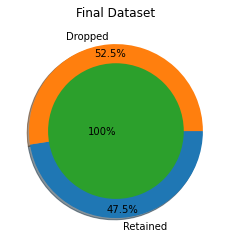


Inference: After the cleanup process, 9885 samples were dropped, while retaining 52.48% of the data.


In [14]:
#그냥 outlier 삭제된 비율.. 시각화
df = df1.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

In [15]:
#train, test set 분리
#칼럼명에 있는 공백 삭제하고 _로 붙이는 과정..
from sklearn.model_selection import train_test_split
m=[]
for i in df.columns.values:
    m.append(i.replace(' ', '_'))
    
df.columns = m
X = df.drop([target], axis=1)
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=100)
X_train.reset_index(drop=True, inplace=True)

print(X_train.shape, X_test.shape)

(7160, 26) (1790, 26)


In [16]:
#피처 스케일링(Standardization)
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = pd.DataFrame(std.fit_transform(X_train), columns=X.columns)
print(X_train.describe())

X_test_std = pd.DataFrame(std.fit_transform(X_test), columns=X.columns)
print(X_test_std.describe())

       song_duration_ms  acousticness  danceability       energy  \
count       7160.000000   7160.000000   7160.000000  7160.000000   
mean      213231.231844      0.251839      0.631507     0.658845   
std        40557.319833      0.274315      0.146478     0.197911   
min       106760.000000      0.000003      0.204000     0.039200   
25%       186048.250000      0.026275      0.537000     0.523000   
50%       210726.000000      0.138000      0.640000     0.684000   
75%       238160.000000      0.414250      0.737250     0.818000   
max       323400.000000      0.985000      0.981000     0.996000   

       instrumentalness     liveness     loudness   audio_mode  speechiness  \
count       7160.000000  7160.000000  7160.000000  7160.000000  7160.000000   
mean           0.000798     0.152466    -6.834462     0.645112     0.069010   
std            0.002331     0.089223     2.768062     0.478513     0.047503   
min            0.000000     0.011900   -14.655000     0.000000     0.02

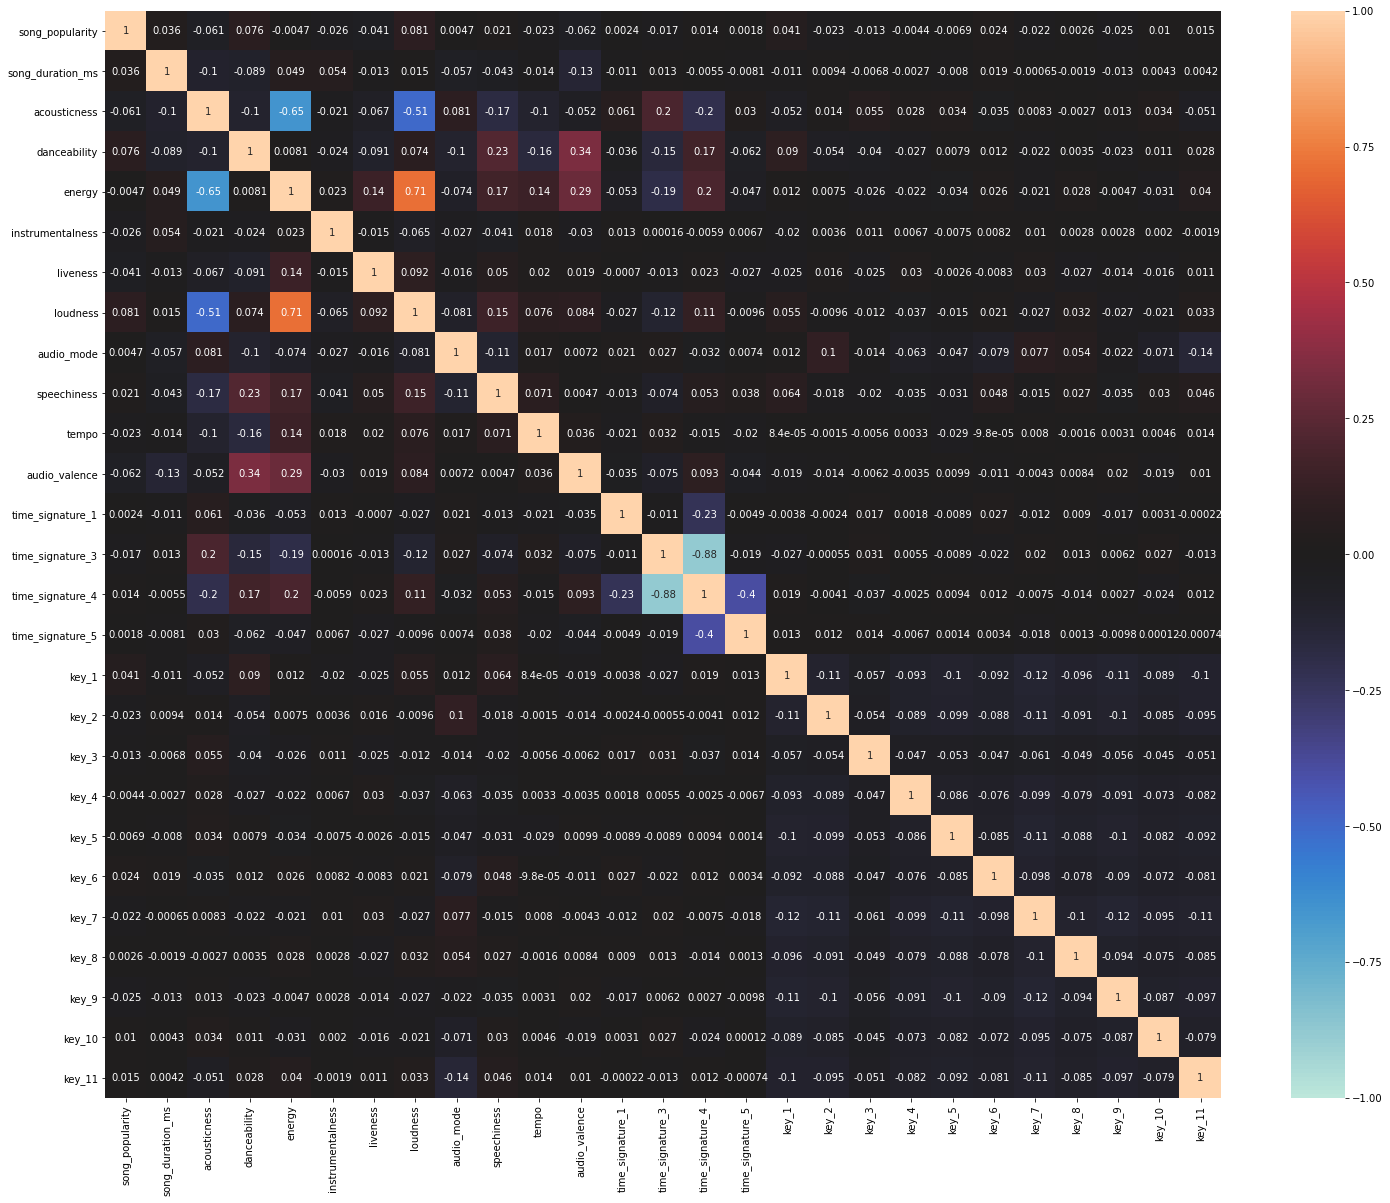

In [17]:
#correlation 체크
plt.figure(figsize=[25,20])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0)
plt.show()

피처들 간 강한 다중공선성이 있음을 확인할 수 있음 -> 고쳐야 한다..!

VIF : 분산팽창요인, 다중회귀모델에서 독립변수 사이의 상관관계를 측정하는 척도

-> 10이 넘으면 다중공선성이 있다고 판단함(5를 기준으로 하기도 함)

-> 두 독립변수 간에 상관관계가 있다면 두 변수의 VIF 모두 높음

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Dropped Features --> ['time_signature_4', 'energy', 'key_7', 'acousticness', 'danceability', 'key_1', 'key_11', 'key_9', 'key_2', 'loudness', 'audio_mode', 'key_5', 'speechiness', 'audio_valence', 'key_4', 'key_6', 'key_3', 'key_8']


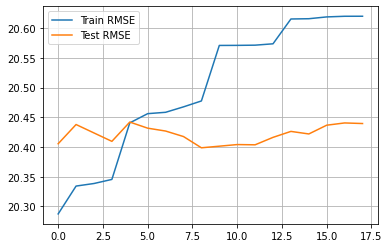

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

Trr=[]; Tss=[]; n=3
order = ['ord-'+str(i) for i in range(2,n)]

DROP = []; b=[]
for i in range(len(X_train_std.columns)):
    vif = pd.DataFrame()
    X = X_train_std.drop(DROP, axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    vif.reset_index(drop=True, inplace=True)
    #vif가 1보다 크면 DROP에 넣고 제외
    #Linear regression 돌려서 RMSE 결과 기록 및 과정 반복
    if vif.loc[0][1] > 1:
        DROP.append(vif.loc[0][0])
        LR = LinearRegression()
        LR.fit(X_train_std.drop(DROP, axis=1), y_train)
        
        pred1 = LR.predict(X_train_std.drop(DROP, axis=1))
        pred2 = LR.predict(X_test_std.drop(DROP, axis=1))
        
        Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
        Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))
        
print('Dropped Features -->', DROP)
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

RFE(Recursive Feature Elimination)

1. 주어진 ML 알고리즘에 fitting하여 importance에 따라 피처의 랭킹 매기기

2. 가장 중요하지 않은 피처를 제외시켜 다시 fitting -> 정해진 수의 피처만 남을때까지 과정 반복하기

<파라미터>
- n_features_to_select : 몇개의 피처를 남길지
- fit() function 사용하여 fit
- support_ : True or False로 어떤 피처가 선택되었는지 제공

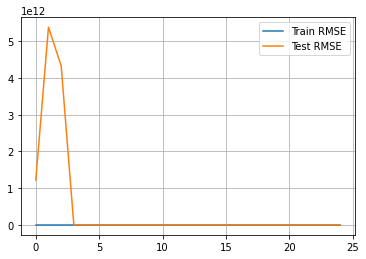

In [19]:
from sklearn.feature_selection import RFE
Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)

m=df.shape[1]-2
for i in range(m):
    lm = LinearRegression()
    rfe = RFE(lm,n_features_to_select=X_train_std.shape[1]-i)             # running RFE
    rfe = rfe.fit(X_train_std, y_train)

    LR = LinearRegression()
    LR.fit(X_train_std.loc[:,rfe.support_], y_train)

    pred1 = LR.predict(X_train_std.loc[:,rfe.support_])
    pred2 = LR.predict(X_test_std.loc[:,rfe.support_])

    Trr.append(np.sqrt(mean_squared_error(y_train, pred1)))
    Tss.append(np.sqrt(mean_squared_error(y_test, pred2)))
    
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

PCA : 대표적인 차원 축소 기법, 변수 사이에 존대하는 상관관계를 이용해 이를 대표하는 주성분 추출

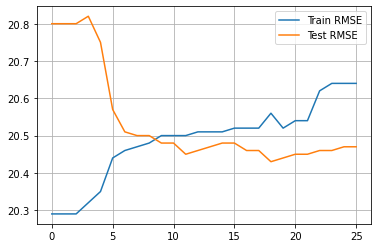

In [20]:
from sklearn.decomposition import PCA

Trr=[]; Tss=[]; n=3
order=['ord-'+str(i) for i in range(2,n)]
Trd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
Tsd = pd.DataFrame(np.zeros((10,n-2)), columns=order)
m=df.shape[1]-1

for i in range(m):
    pca = PCA(n_components=X_train_std.shape[1]-i)
    X_train_std_pca = pca.fit_transform(X_train_std)
    X_test_std_pca = pca.fit_transform(X_test_std)
    
    lr = LinearRegression()
    lr.fit(X_train_std_pca, y_train)
    
    pred1 = lr.predict(X_train_std_pca)
    pred2 = lr.predict(X_test_std_pca)
    
    Trr.append(round(np.sqrt(mean_squared_error(y_train, pred1)),2))
    Tss.append(round(np.sqrt(mean_squared_error(y_test, pred2)),2))
    
plt.plot(Trr, label='Train RMSE')
plt.plot(Tss, label='Test RMSE')
plt.legend()
plt.grid()
plt.show()

In [21]:
lm = LinearRegression()
rfe = RFE(lm,n_features_to_select=X_train_std.shape[1]-df.shape[1]+10)             # running RFE
rfe = rfe.fit(X_train_std, y_train)

LR = LinearRegression()
LR.fit(X_train_std.loc[:,rfe.support_], y_train)

#print(Train_X_std.loc[:,rfe.support_].columns)

pred1 = LR.predict(X_train_std.loc[:,rfe.support_])
pred2 = LR.predict(X_test_std.loc[:,rfe.support_])

print(np.sqrt(mean_squared_error(y_train, pred1)))
print(np.sqrt(mean_squared_error(y_test, pred2)))

20.318048532828218
20.394303428989563


In [22]:
m=[]
for i in df.columns.values:
    m.append(i.replace(' ','_'))
    
df.columns = m
X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

In [23]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,...,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03,7.160000e+03
mean,-2.201839e-16,-6.366726e-17,-4.488650e-16,-9.452402e-17,-1.023675e-16,9.999760e-17,2.180906e-16,-4.141008e-16,-1.044943e-16,-1.571679e-16,...,2.755245e-16,-3.994710e-16,-2.493350e-16,-1.058573e-15,2.239828e-16,8.855889e-16,3.041174e-16,4.315294e-17,2.786102e-16,1.325910e-16
std,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,...,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00,1.000070e+00
min,-2.625387e+00,-9.181177e-01,-2.918774e+00,-3.131156e+00,-3.425841e-01,-1.575563e+00,-2.825473e+00,-1.348254e+00,-9.812680e-01,-2.528553e+00,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
25%,-6.702830e-01,-8.223387e-01,-6.452384e-01,-6.864460e-01,-3.425841e-01,-6.881147e-01,-5.876500e-01,-1.348254e+00,-6.975836e-01,-7.615380e-01,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
50%,-6.177447e-02,-4.150227e-01,5.798743e-02,1.271097e-01,-3.411082e-01,-3.751120e-01,1.864114e-01,7.417001e-01,-4.002151e-01,-1.426259e-02,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
75%,6.146981e-01,5.921024e-01,7.219555e-01,8.042306e-01,-2.673929e-01,4.767485e-01,7.447833e-01,7.417001e-01,2.966273e-01,6.418977e-01,...,-3.215677e-01,-1.695159e-01,-2.772249e-01,-3.073541e-01,-2.801351e-01,-3.603778e-01,-2.824479e-01,-3.239418e-01,-2.671612e-01,-2.974504e-01
max,2.716562e+00,2.672887e+00,2.386143e+00,1.703690e+00,6.650948e+00,2.864200e+00,2.376364e+00,7.417001e-01,3.368207e+00,2.773299e+00,...,3.109765e+00,5.899152e+00,3.607179e+00,3.253577e+00,3.569706e+00,2.774865e+00,3.540476e+00,3.086975e+00,3.743058e+00,3.361905e+00



                                          Standardardization on Testing set                                          


,song_duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,audio_mode,speechiness,tempo,...,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11
count,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,...,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000,1790.000000
mean,0.036125,-0.014032,0.006938,0.028758,0.010602,-0.058353,0.026948,0.009632,-0.023773,-0.005688,...,-0.012939,0.006781,-0.001628,0.024867,-0.058608,-0.015326,0.025095,0.036205,-0.022964,-0.003066
std,0.971755,0.975985,0.990170,0.974326,1.002490,0.982153,0.979911,0.997307,0.968979,1.002542,...,0.981985,1.019502,0.997564,1.035975,0.896783,0.981478,1.040064,1.048494,0.959254,0.995564
min,-2.491247,-0.918115,-2.932429,-2.934083,-0.342584,-1.543058,-2.781757,-1.348254,-0.972847,-2.236695,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
25%,-0.613785,-0.815321,-0.624756,-0.610649,-0.342584,-0.734631,-0.562450,-1.348254,-0.703373,-0.755222,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
50%,-0.024516,-0.425960,0.064815,0.149849,-0.341076,-0.425551,0.223624,0.741700,-0.412847,-0.021330,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
75%,0.611647,0.586634,0.733904,0.809284,-0.262995,0.373068,0.727351,0.741700,0.323469,0.580851,...,-0.321568,-0.169516,-0.277225,-0.307354,-0.280135,-0.360378,-0.282448,-0.323942,-0.267161,-0.297450
max,2.685640,2.669241,2.345178,1.693583,6.608043,2.852991,2.786427,0.741700,3.368207,2.675691,...,3.109765,5.899152,3.607179,3.253577,3.569706,2.774865,3.540476,3.086975,3.743058,3.361905


모델을 평가하는 과정에 Evaluate()라는 함수를 만들어 사용하자

In [24]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,3,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
        plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
        plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred1)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77910209e-01 -1.60475221e+00  1.74874371e+00 -2.58657432e+00
 -3.17046728e-01 -6.22655634e-01  2.87715642e+00  4.42388043e-01
 -3.61599970e-01 -1.31739726e-01 -1.46962101e+00 -4.27552307e+12
 -1.55683817e+13 -1.76557015e+13 -7.56541625e+12  4.68224043e-01
 -5.87000195e-01 -1.64111441e-01  1.64828861e-01 -1.84476274e-01
  2.32427223e-01 -5.76967010e-01 -1.34707796e-01 -4.84475975e-01
  2.63435816e-01  3.31571769e-01]
The Intercept of the Regresion Model was found to be  50.30209681559605


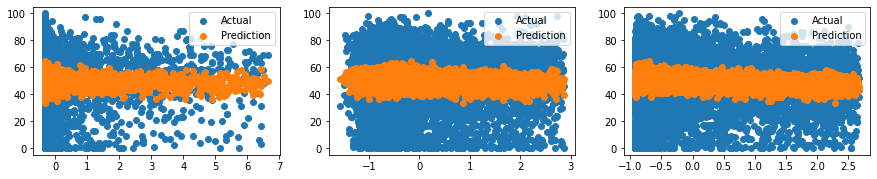



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.03718856234267043
Residual Sum of Squares (RSS) on Training set  ---> 2946921.598119933
Mean Squared Error (MSE) on Training set       ---> 411.5812287877001
Root Mean Squared Error (RMSE) on Training set ---> 20.287464819136474

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.0032959413275682747
Residual Sum of Squares (RSS) on Training set  ---> 745207.2408764213
Mean Squared Error (MSE) on Training set       ---> 416.31689434436953
Root Mean Squared Error (RMSE) on Training set ---> 20.4038450872469

--------------------Residual Plots--------------------


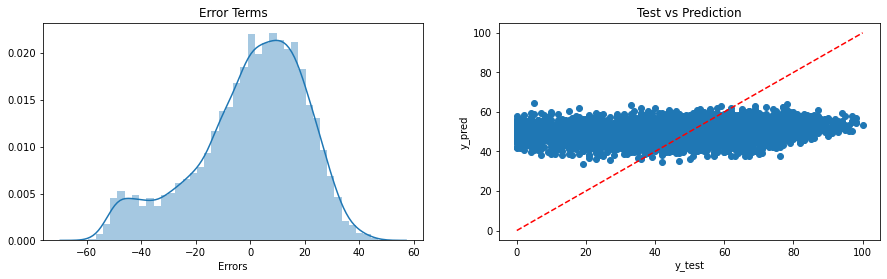

In [25]:
#multiple linear regression(MLR)
from sklearn.metrics import r2_score, mean_absolute_error
MLR = LinearRegression().fit(Train_X_std, Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77910209e-01 -1.60475221e+00  1.74874371e+00 -2.58657432e+00
 -3.17046728e-01 -6.22655634e-01  2.87715642e+00  4.42388043e-01
 -3.61599970e-01 -1.31739726e-01 -1.46962101e+00 -4.27552307e+12
 -1.55683817e+13 -1.76557015e+13 -7.56541625e+12  4.68224043e-01
 -5.87000195e-01 -1.64111441e-01  1.64828861e-01 -1.84476274e-01
  2.32427223e-01 -5.76967010e-01 -1.34707796e-01 -4.84475975e-01
  2.63435816e-01  3.31571769e-01]
The Intercept of the Regresion Model was found to be  50.30209681559605


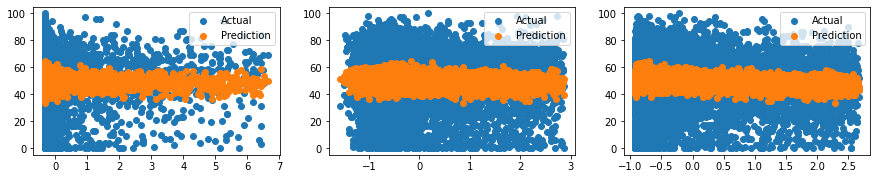



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.037189091772393934
Residual Sum of Squares (RSS) on Training set  ---> 2946919.977669837
Mean Squared Error (MSE) on Training set       ---> 411.5810024678543
Root Mean Squared Error (RMSE) on Training set ---> 20.28745924131098

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.003420710915271186
Residual Sum of Squares (RSS) on Training set  ---> 745113.954208841
Mean Squared Error (MSE) on Training set       ---> 416.2647788876206
Root Mean Squared Error (RMSE) on Training set ---> 20.40256794836426

--------------------Residual Plots--------------------


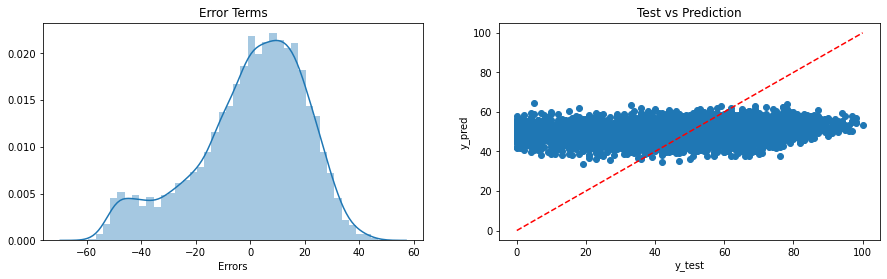

In [26]:
#Ridge Regression
from sklearn.linear_model import Ridge
RLR = Ridge().fit(Train_X_std, Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77910209e-01 -1.60475221e+00  1.74874371e+00 -2.58657432e+00
 -3.17046728e-01 -6.22655634e-01  2.87715642e+00  4.42388043e-01
 -3.61599970e-01 -1.31739726e-01 -1.46962101e+00 -4.27552307e+12
 -1.55683817e+13 -1.76557015e+13 -7.56541625e+12  4.68224043e-01
 -5.87000195e-01 -1.64111441e-01  1.64828861e-01 -1.84476274e-01
  2.32427223e-01 -5.76967010e-01 -1.34707796e-01 -4.84475975e-01
  2.63435816e-01  3.31571769e-01]
The Intercept of the Regresion Model was found to be  50.30209681559605


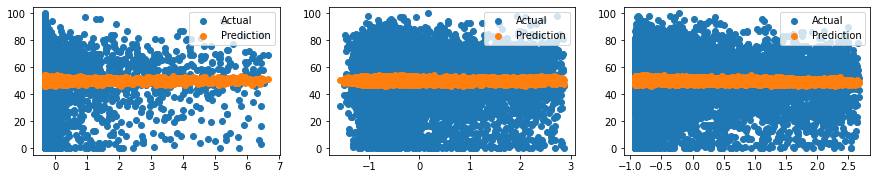



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.015140165780251126
Residual Sum of Squares (RSS) on Training set  ---> 3014406.14752641
Mean Squared Error (MSE) on Training set       ---> 421.00644518525286
Root Mean Squared Error (RMSE) on Training set ---> 20.51844158763654

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007117147140071945
Residual Sum of Squares (RSS) on Training set  ---> 742350.234109388
Mean Squared Error (MSE) on Training set       ---> 414.72080117842904
Root Mean Squared Error (RMSE) on Training set ---> 20.364694968951266

--------------------Residual Plots--------------------


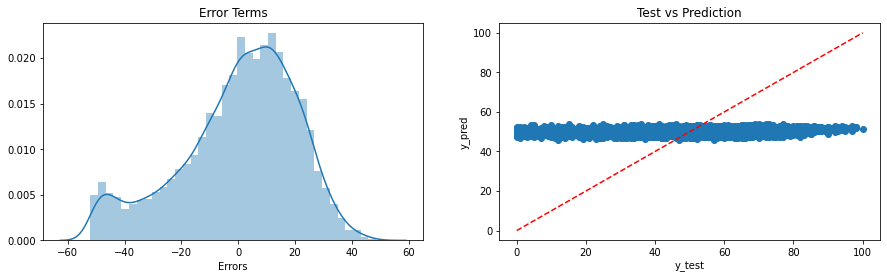

In [27]:
#Lasso Regression
from sklearn.linear_model import Lasso
LLR = Lasso().fit(Train_X_std, Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 6.77910209e-01 -1.60475221e+00  1.74874371e+00 -2.58657432e+00
 -3.17046728e-01 -6.22655634e-01  2.87715642e+00  4.42388043e-01
 -3.61599970e-01 -1.31739726e-01 -1.46962101e+00 -4.27552307e+12
 -1.55683817e+13 -1.76557015e+13 -7.56541625e+12  4.68224043e-01
 -5.87000195e-01 -1.64111441e-01  1.64828861e-01 -1.84476274e-01
  2.32427223e-01 -5.76967010e-01 -1.34707796e-01 -4.84475975e-01
  2.63435816e-01  3.31571769e-01]
The Intercept of the Regresion Model was found to be  50.30209681559605


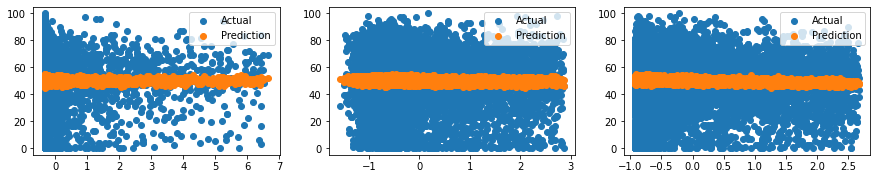



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.019205092299083293
Residual Sum of Squares (RSS) on Training set  ---> 3001964.438501573
Mean Squared Error (MSE) on Training set       ---> 419.26877632703537
Root Mean Squared Error (RMSE) on Training set ---> 20.476053729345296

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.007624464892474702
Residual Sum of Squares (RSS) on Training set  ---> 741970.9270731356
Mean Squared Error (MSE) on Training set       ---> 414.50889780622094
Root Mean Squared Error (RMSE) on Training set ---> 20.35949159007221

--------------------Residual Plots--------------------


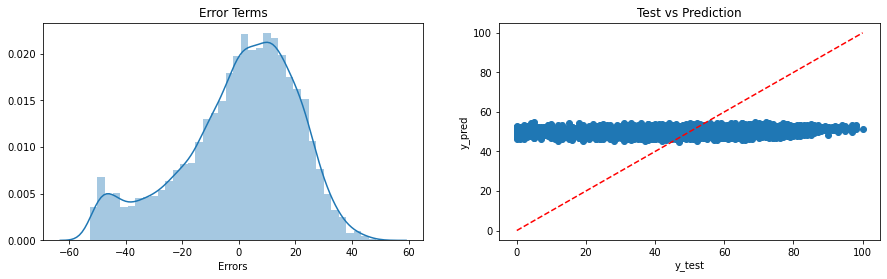

In [28]:
#엘라스틱넷
from sklearn.linear_model import ElasticNet
ENR = ElasticNet().fit(Train_X_std, Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

degree=4일때 rmse 최소

In [ ]:
#Using the 2nd Order Polynomial Regression model (degree=2)
from sklearn.preprocessing import PolynomialFeatures

poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

In [ ]:
#회귀 모델들 평가 
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

In [ ]:
cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5
plt.bar(np.arange(5), Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(5)+0.3, Model_Evaluation_Comparison_Matrix[cc[7]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(5),EMC.index, rotation =35)
plt.legend()
plt.ylim([0,25])
plt.show()

다른 모델들의 성능은 비슷하나 Polynomial Regression Model에서 과적합 발생